In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
from scipy import stats
sys.path.append('../../CEBRA_analysis')
from dataset_load import data_load

In [2]:
skipdates = ["220818", "220819"]
input_folder = "/sc-projects/sc-proj-cc15-ag-wenger-retune/data_kinematic_states_neural/"
VICON_FS = 200
variables_to_drop = ["ANIMAL_ID", "CONDITION", "RUN", "DATE", "EVENT", "ECOG_LEFT_fooof_a_knee", "ECOG_RIGHT_fooof_a_knee"]
data_dict = data_load(input_folder, variables_to_drop, skipdates)

No file found for 230425 NWE00161 02
No file found for 230425 NWE00161 08
No file found for 230425 NWE00160 04
No file found for 230425 NWE00160 03
No file found for 230425 NWE00164 21


In [3]:
df = data_dict["X_pd"]
df["EVENTS"] = data_dict["y_pd"]


In [4]:
[i for i in df.columns if "Mobility" in i]

['ECOG_LEFT_RawHjorth_Mobility', 'ECOG_RIGHT_RawHjorth_Mobility']

In [5]:
fog = np.where(data_dict["y_pd"]==0, 1, 0)
fog_start = np.where(fog[:-1] < fog[1:])[0]
fog_prev = fog_start - 200
fog_end = fog_start + 200

In [12]:
chunks_complex = []
chunks_beta = []
chunks_gamma = []
chunks_mobility = []
for start, end in zip(fog_prev, fog_end):
    chunks_complex.append(df["ECOG_LEFT_RawHjorth_Complexity"].iloc[start:end].values)
    chunks_beta.append(df["ECOG_LEFT_fft_high beta"].iloc[start:end].values)
    chunks_mobility.append(df["ECOG_RIGHT_RawHjorth_Mobility"].iloc[start:end].values)
    chunks_gamma.append(df["ECOG_RIGHT_fft_high gamma"].iloc[start:end].values)
chunks_complex = stats.zscore(np.asarray(chunks_complex), axis=1)
chunks_beta = stats.zscore(np.asarray(chunks_beta), axis=1)
chunks_mobility = stats.zscore(np.asarray(chunks_mobility), axis=1)
chunks_gamma = stats.zscore(np.asarray(chunks_gamma), axis=1)

In [13]:
def plot_it(a, ax, color, norm=False):
    if norm:
        a = a - a.mean(axis=1, keepdims=True)
    mean = a.mean(axis=0)
    std = a.std(axis=0)
    std_up = mean + std
    std_down = mean - std
    ax.fill_between(range(len(mean)), std_down, std_up, color=color, alpha=0.2)
    ax.plot(mean, color=color, linewidth=3)
    return ax

In [14]:
color_map = {'ECOG_LEFT_RawHjorth_Complexity': np.array([0.64959573, 0.74985201, 0.79400674, 1.        ]),
 'ECOG_RIGHT_fft_high gamma': np.array([0.37431313, 0.39503895, 0.71098797, 1.        ]),
 'ECOG_LEFT_stft_high beta': np.array([0.23433056, 0.0669356 , 0.2957401 , 1.        ]),
 'ECOG_LEFT_fft_high beta': np.array([0.49335504, 0.13328092, 0.31386562, 1.        ]),
 'ECOG_RIGHT_RawHjorth_Mobility': np.array([0.76822177, 0.50649362, 0.40061257, 1.        ])}

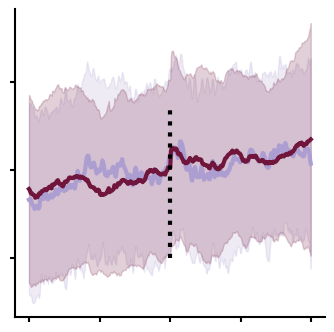

In [15]:
fig, ax = plt.subplots(figsize=(4,4))

ax = plot_it(chunks_beta, ax, "#AC9ED1", norm=True)
ax = plot_it(chunks_complex, ax, "#70163C", norm=True)


ax.vlines(200, -1, 0.7, color="k", linewidth=3, linestyle=":")
#ax.set_ylim(-1, 1)
ax.set_xticks([0, 100, 200, 300, 400], labels=[])
ax.set_yticks([-1, 0, 1], labels=[])
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.tick_params(width=1.5)
#plt.savefig("beta_comples.svg", transparent=True)

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))


ax = plot_it(chunks_gamma, ax, "#519872", norm=True)
ax = plot_it(chunks_mobility, ax, "#15467A", norm=True)


ax.vlines(200, -1, 0.7, color="k", linewidth=3, linestyle=":")
ax.set_xticks([0, 100, 200, 300, 400], labels=[])
ax.set_ylim(-1, 1)
ax.set_yticks([-1, 0, 1], labels=[])
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.tick_params(width=1.5)
#plt.savefig("gamma_mobility.svg", transparent=True)

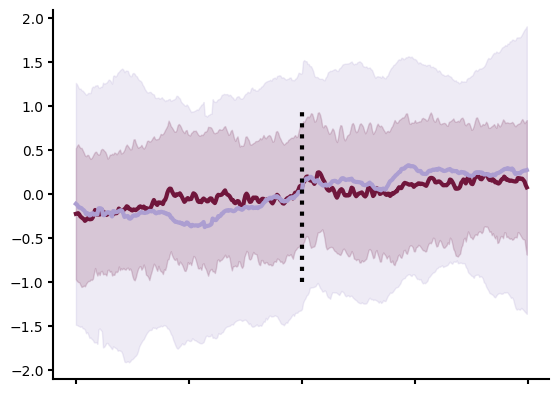

In [44]:
fig, ax = plt.subplots()

mix = chunks_complex - (chunks_mobility )
mix_ = chunks_beta - (chunks_gamma )
ax = plot_it(chunks_beta, ax, "#70163C", True)
ax = plot_it(mix, ax, "#AC9ED1", True)


ax.vlines(200, -1, 1, color="k", linewidth=3, linestyle=":")
ax.set_xticks([0, 100, 200, 300, 400], labels=[])
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.tick_params(width=1.5)

In [36]:
#diff_c = np.diff(chunks_complex, axis=0)
#diff_b = np.diff(chunks_beta, axis=0)
#
#fig, ax = plt.subplots()
#
#ax = plot_it(diff_b, ax, "#70163C", True)
#ax = plot_it(diff_c, ax, "#AC9ED1", True)
#
#
#ax.vlines(200, -1, 1.5, color="k", linewidth=3, linestyle=":")
##ax.set_xticks([0, 100, 200, 300, 400], labels=[])
#ax.set_ylim(-0.2, 0.2)
#ax.spines[["top", "right"]].set_visible(False)
#ax.spines[["left", "bottom"]].set_linewidth(1.5)
#ax.tick_params(width=1.5)

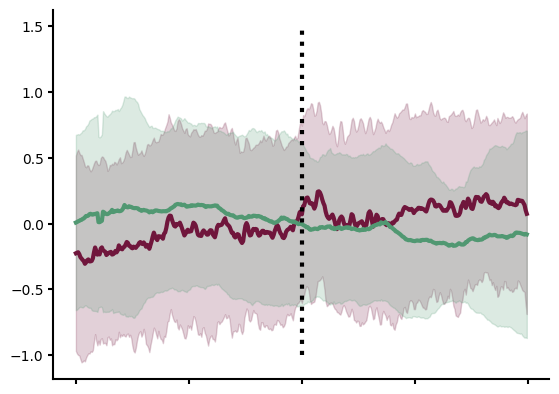

In [37]:
fig, ax = plt.subplots()

ax = plot_it(chunks_beta, ax, "#70163C", True)
ax = plot_it(chunks_mobility, ax, "#519872", True)


ax.vlines(200, -1, 1.5, color="k", linewidth=3, linestyle=":")
ax.set_xticks([0, 100, 200, 300, 400], labels=[])
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.tick_params(width=1.5)

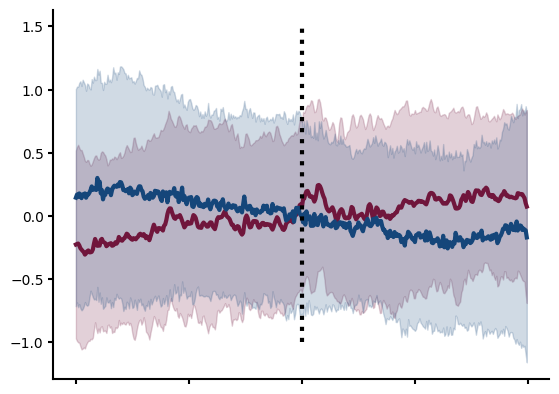

In [38]:
fig, ax = plt.subplots()

ax = plot_it(chunks_beta, ax, "#70163C", True)
ax = plot_it(chunks_gamma, ax, "#15467A", True)


ax.vlines(200, -1, 1.5, color="k", linewidth=3, linestyle=":")
ax.set_xticks([0, 100, 200, 300, 400], labels=[])
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.tick_params(width=1.5)

In [20]:
gait = np.where(data_dict["y_pd"]==2, 1, 0)
gait_start = np.where(gait[:-1] < gait[1:])[0]
gait_prev = gait_start - 200
gait_end = gait_start + 200

chunks_complex = []
chunks_beta = []
chunks_gamma = []
chunks_mobility = []
for start, end in zip(gait_prev, gait_end):
    chunks_complex.append(df["ECOG_LEFT_RawHjorth_Complexity"].iloc[start:end].values)
    chunks_beta.append(df["ECOG_LEFT_fft_high beta"].iloc[start:end].values)
    chunks_mobility.append(df["ECOG_RIGHT_RawHjorth_Mobility"].iloc[start:end].values)
    chunks_gamma.append(df["ECOG_RIGHT_fft_high gamma"].iloc[start:end].values)
chunks_complex = np.asarray(chunks_complex)
chunks_beta = np.asarray(chunks_beta)
chunks_mobility = np.asarray(chunks_mobility)
chunks_gamma = np.asarray(chunks_gamma)

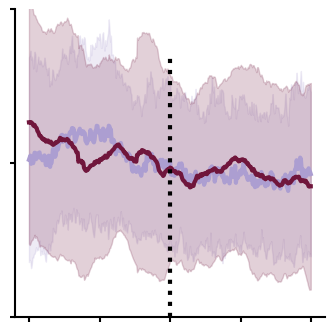

In [22]:
fig, ax = plt.subplots(figsize=(4,4))

ax = plot_it(chunks_beta, ax, "#AC9ED1", norm=True)
ax = plot_it(chunks_complex, ax, "#70163C", norm=True)


ax.vlines(200, -1, 0.7, color="k", linewidth=3, linestyle=":")
ax.set_ylim(-1, 1)
ax.set_xticks([0, 100, 200, 300, 400], labels=[])
ax.set_yticks([-1, 0, 1], labels=[])
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.tick_params(width=1.5)
#plt.savefig("beta_comples.svg", transparent=True)

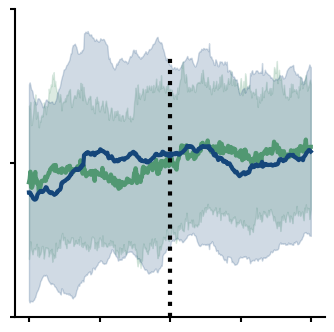

In [23]:
fig, ax = plt.subplots(figsize=(4,4))


ax = plot_it(chunks_gamma, ax, "#519872", norm=True)
ax = plot_it(chunks_mobility, ax, "#15467A", norm=True)


ax.vlines(200, -1, 0.7, color="k", linewidth=3, linestyle=":")
ax.set_xticks([0, 100, 200, 300, 400], labels=[])
ax.set_ylim(-1, 1)
ax.set_yticks([-1, 0, 1], labels=[])
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.tick_params(width=1.5)
#plt.savefig("gamma_mobility.svg", transparent=True)

In [34]:
nlm = np.where(data_dict["y_pd"]==1, 1, 0)
nlm_start = np.where(nlm[:-1] < nlm[1:])[0][:-1]
nlm_prev = nlm_start - 200
nlm_end = nlm_start + 200

chunks_complex = []
chunks_beta = []
chunks_gamma = []
chunks_mobility = []
for start, end in zip(nlm_prev, nlm_end):
    chunks_complex.append(df["ECOG_LEFT_RawHjorth_Complexity"].iloc[start:end].values)
    chunks_beta.append(df["ECOG_LEFT_stft_high beta"].iloc[start:end].values)
    chunks_mobility.append(df["ECOG_RIGHT_RawHjorth_Mobility"].iloc[start:end].values)
    chunks_gamma.append(df["ECOG_RIGHT_fft_high gamma"].iloc[start:end].values)
chunks_complex = np.asarray(chunks_complex)
chunks_beta = np.asarray(chunks_beta)
chunks_mobility = np.asarray(chunks_mobility)
chunks_gamma = np.asarray(chunks_gamma)

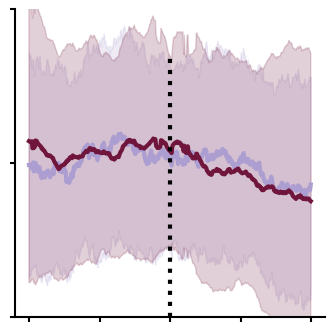

In [35]:
fig, ax = plt.subplots(figsize=(4,4))

ax = plot_it(chunks_beta, ax, "#AC9ED1", norm=True)
ax = plot_it(chunks_complex, ax, "#70163C", norm=True)


ax.vlines(200, -1, 0.7, color="k", linewidth=3, linestyle=":")
ax.set_ylim(-1, 1)
ax.set_xticks([0, 100, 200, 300, 400], labels=[])
ax.set_yticks([-1, 0, 1], labels=[])
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.tick_params(width=1.5)
#plt.savefig("beta_comples.svg", transparent=True)

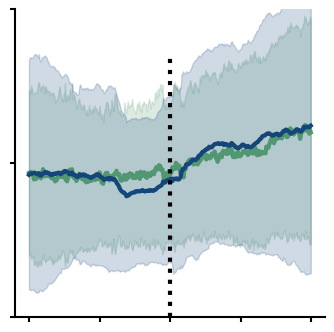

In [36]:
fig, ax = plt.subplots(figsize=(4,4))


ax = plot_it(chunks_gamma, ax, "#519872", norm=True)
ax = plot_it(chunks_mobility, ax, "#15467A", norm=True)


ax.vlines(200, -1, 0.7, color="k", linewidth=3, linestyle=":")
ax.set_xticks([0, 100, 200, 300, 400], labels=[])
ax.set_ylim(-1, 1)
ax.set_yticks([-1, 0, 1], labels=[])
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.tick_params(width=1.5)
#plt.savefig("gamma_mobility.svg", transparent=True)

In [60]:
import random
n = 75
a, b = 0, len(data_dict["X_pd"])
random_numbers = np.asarray([random.randint(a, b) for _ in range(n)])

rnd_start = random_numbers
rnd_prev = rnd_start - 200
rnd_end = rnd_start + 200

chunks_complex = []
chunks_beta = []
chunks_gamma = []
chunks_mobility = []
for start, end in zip(rnd_prev, rnd_end):
    chunks_complex.append(df["ECOG_LEFT_RawHjorth_Complexity"].iloc[start:end].values)
    chunks_beta.append(df["ECOG_LEFT_stft_high beta"].iloc[start:end].values)
    chunks_mobility.append(df["ECOG_RIGHT_RawHjorth_Mobility"].iloc[start:end].values)
    chunks_gamma.append(df["ECOG_RIGHT_fft_high gamma"].iloc[start:end].values)
chunks_complex = np.asarray(chunks_complex)
chunks_beta = np.asarray(chunks_beta)
chunks_mobility = np.asarray(chunks_mobility)
chunks_gamma = np.asarray(chunks_gamma)

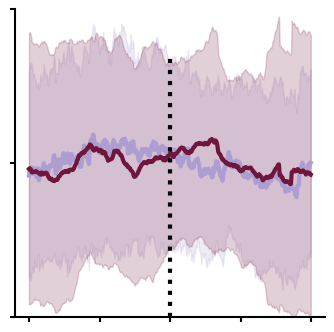

In [61]:
fig, ax = plt.subplots(figsize=(4,4))

ax = plot_it(chunks_beta, ax, "#AC9ED1", norm=True)
ax = plot_it(chunks_complex, ax, "#70163C", norm=True)


ax.vlines(200, -1, 0.7, color="k", linewidth=3, linestyle=":")
ax.set_ylim(-1, 1)
ax.set_xticks([0, 100, 200, 300, 400], labels=[])
ax.set_yticks([-1, 0, 1], labels=[])
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.tick_params(width=1.5)
#plt.savefig("beta_comples.svg", transparent=True)

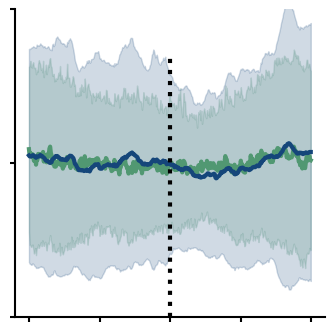

In [62]:
fig, ax = plt.subplots(figsize=(4,4))


ax = plot_it(chunks_gamma, ax, "#519872", norm=True)
ax = plot_it(chunks_mobility, ax, "#15467A", norm=True)


ax.vlines(200, -1, 0.7, color="k", linewidth=3, linestyle=":")
ax.set_xticks([0, 100, 200, 300, 400], labels=[])
ax.set_ylim(-1, 1)
ax.set_yticks([-1, 0, 1], labels=[])
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.tick_params(width=1.5)
#plt.savefig("gamma_mobility.svg", transparent=True)

[326441,
 44776,
 69994,
 32844,
 175867,
 232522,
 107613,
 175715,
 153653,
 129629,
 281973,
 286185,
 162941,
 313312,
 53514,
 250306,
 24340,
 306421,
 224994,
 92531,
 209064,
 192118,
 225152,
 142503,
 102882,
 319534,
 279885,
 268449,
 199149,
 148162,
 153091,
 48951,
 276198,
 136469,
 249551,
 168958,
 206193,
 75821,
 10603,
 205151,
 268472,
 89504,
 287578,
 226409,
 109483,
 119303,
 88597,
 173635,
 259217,
 131884,
 185464,
 274510,
 218795,
 135942,
 8792,
 84653,
 308957,
 325373,
 311331,
 259210,
 37917,
 268098,
 170537,
 17089,
 227891,
 245980,
 44612,
 222675,
 99739,
 157267,
 303921,
 170291,
 46498,
 284985,
 75795]